In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data_dir = '/content/drive/MyDrive/Colab_Notebooks/Deep Learning/Build deep learning models with tensorflow/Image Classification/classification-challenge.zip (Unzipped Files)/classification-challenge/classification-challenge-starter/Covid19-dataset/train'
validation_data_dir = '/content/drive/MyDrive/Colab_Notebooks/Deep Learning/Build deep learning models with tensorflow/Image Classification/classification-challenge.zip (Unzipped Files)/classification-challenge/classification-challenge-starter/Covid19-dataset/test'

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 84, 84, 16)        416       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 392)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 392)               0         
_______________________________________

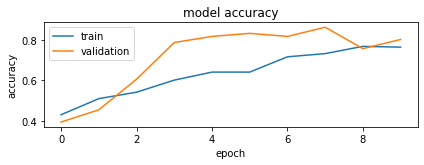

              precision    recall  f1-score   support

       Covid       0.55      0.46      0.50        26
      Normal       0.42      0.55      0.48        20
   Pneumonia       0.28      0.25      0.26        20

    accuracy                           0.42        66
   macro avg       0.42      0.42      0.41        66
weighted avg       0.43      0.42      0.42        66

[[12  7  7]
 [ 3 11  6]
 [ 7  8  5]]


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as numpy


train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_iterator = train_datagen.flow_from_directory(
  train_data_dir, 
  target_size = (256, 256),
  class_mode = 'categorical',
  color_mode = 'grayscale',
  batch_size = 8
)
validation_iterator = test_datagen.flow_from_directory(
  validation_data_dir,
  target_size = (256, 256),
  class_mode = 'categorical',
  color_mode = 'grayscale',
  batch_size = 8
)
# Creating a Classification Neural Network
model = Sequential()

model.add(tf.keras.Input(shape = (256,256, 1)))
model.add(layers.Conv2D(16, 5, strides=3, activation="relu")) 
model.add(layers.MaxPooling2D(
    pool_size=(5, 5), strides=(5,5)))
model.add(layers.Conv2D(8, 3, strides=1, activation="relu")) 
model.add(layers.MaxPooling2D(
    pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(3, activation = 'softmax'))

print(model.summary())

# compiling the model
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss = loss, optimizer = opt, metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])

BATCH_SIZE = 8


# train and evaluating the model
history = model.fit(
        train_iterator,
        steps_per_epoch=train_iterator.samples/BATCH_SIZE,
        epochs=10,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples/BATCH_SIZE)

# Do Matplotlib extension below
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

 
# used to keep plots from overlapping
fig.tight_layout()
 
fig.savefig('my_plots.png')
plt.show()

test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   
 
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)
